In [1]:
import numpy as np
import torch
from michigrad.michigrad.visualize import show_graph
from michigrad.michigrad.engine import Value
from michigrad.michigrad.nn import Module, Neuron, Layer, MLP

In [3]:

w0 = Value(-.5,name ='w0')
x0 = Value(.5,name ='x0')
w1 = Value(-.3,name ='w1')
x1 = Value(2,name ='x1')
w0x0    = w0 * x0; w0x0.name ='w0x0'
w1x1    = w1 * x1; w1x1.name ='w1x1'
yhat = w0x0 + w1x1; yhat.name ='yhat'

y= Value(.8,name ='y')
L = y-yhat; L.name ='L'
L.backward()
w0.grad

-0.5

In [9]:
w0 = torch.tensor(-.5); w0.requires_grad = True
x0 = torch.tensor(.5); x0.requires_grad = True
w1 = torch.tensor(-.3); w1.requires_grad = True
x1 = torch.tensor(2.); x1.requires_grad = True
yhat = w0 * x0 + w1 * x1
y = torch.tensor(.8); y.requires_grad = True
L = y - yhat
L.backward()
w0

tensor(-0.5000, requires_grad=True)

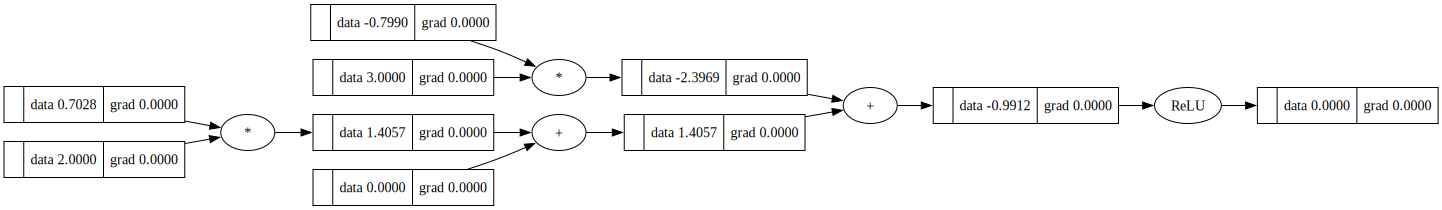

In [10]:
x = [2,3]
n = Neuron(2)
n(x) #forward pass de la neurona
show_graph(n(x)) #visualizar el grafo computacional

In [13]:
xor = MLP(2, [3,3,1]) # 2 entradas, una capa oculta con 3 salidas, 
xs = [[0,0],[0,1],[1,0],[1,1]]
ys = [0,1,1,0]




In [14]:
yhats = [xor(x) for x in xs]
yhats

[Value(data=0.0, grad=0, name=),
 Value(data=0.04323432381424267, grad=0, name=),
 Value(data=0.19287162267737484, grad=0, name=),
 Value(data=0.0, grad=0, name=)]

In [15]:
lossM = [(y-yhat)**2 for y, yhat, in zip(ys,yhats)] 
#Aca la funcion de perdida es de cada salida, deberia ser un solo numero, por lo que
loss = sum([(y-yhat)**2 for y, yhat, in zip(ys,yhats)])/len(yhats)
loss

Value(data=0.39171419415166087, grad=0, name=)

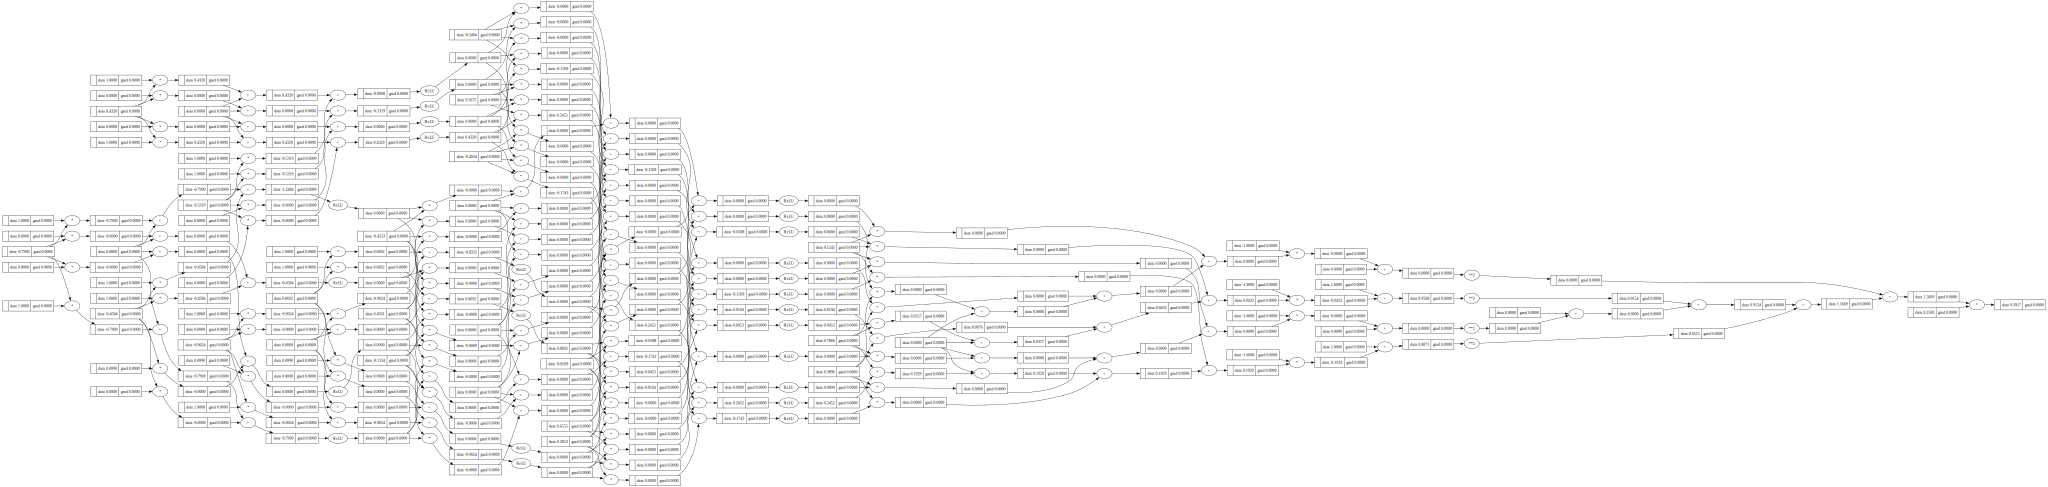

In [17]:
#muestra del grafo del Loss. 
# Muestra lo nodos y los calculos que se hacen para hacerlo
show_graph(loss)

In [16]:
#Modificar los pesos para que la funcion de perdida sea mas chica